## 0. Librerías usadas

En este cuaderno usaremos ``numpy`` y ``matplotlib``. Esta celda importa estos paquetes y define que la salida de las gráficas se muestre en el cuaderno al correr la celda. El tercer paquete de ``matplotlib`` es para que algunos aspectos de los textos de las gráficas queden mejores.
$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xv}{\vec{x}}
\newcommand{\ome}{\omega}
\newcommand{\eps}{\epsilon}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
$$

In [11]:
#Importamos algunas librerías
import matplotlib.pyplot as plt
import numpy as nmp
from matplotlib import rcParams
%matplotlib inline

## 1. El método de Newton-Raphson

Tomemos una función real derivable en una variable $f(x)$. Queremos hallar sus **_raíces_**, es decir, los valores de $x$ para los que la función vale cero. Como ejemplo, utlizaremos el polinomio $f(x)=(x+2)(x-2)(x-4)$. Supongamos que comenzamos ensayando un número cualquiera, por ejemplo $x_0=0.3$. Notemos que $y_0=f(x_0)=14.467$, así que claramente esta no es una raíz. Sin embargo, podemos aproximar la función alrededor del punto $x_0$ mediante la recta tangente a ese punto. Llamemos a la función de esta recta $g_0(x)$. Esta función cumple una ecuación de la forma:
$$
\begin{equation}
\frac{g_0(x)-y_0}{x-x_0}=f'(x_0)\;,
\tag{1}
\end{equation}
$$
donde $f'(x_0)$ es la derivada en el punto $x_0$. Esta función derivada es,
$$
f'(x)=\frac{d}{dx}\left(x^3-4x^2-4x+16\right)=3x^2-8x-4\;.
\tag{2}
$$
Esta recta corta el eje $x$ en el punto $x_1=x_0-\frac{y_0}{f'(x_0)}$. La esperanza es que este nuevo punto esté más cerca a una raíz, pues aproximamos el comportamiento de la función para hallarlo. Muy probablemente, al calcular $y_1=f(x_1)$ también encontraremos que $y_1 \neq 0$. Aún así, podemos repetir el procedimiento antes descrito y hallar un $x_2=x_1-\frac{y_1}{f'(x_1)}$. Así, se define iterativamente una sucesión $x_0,x_1,x_2,x_3,\ldots$ con $x_{n+1}=x_n-\frac{y_n}{f'(x_n)}$. Si definimos que queremos hallar nuestra raíz con una precisión $\epsilon$, es decir, iteramos el método hasta un paso $N$ para el que $|y_N|<\eps$, nos podremos dar por satisfechos de haber encontrado numéricamente una raíz. Esta es la esencia del **_método de Newton-Raphson_**. Quedan por aclarar dos detalles técnicos:
1. El primero es qué hacer si $f'(x_i)=0$. En este caso simplemente se cambia $x_i$ a un $x_{i+1}$ cercano escogido por cualquier método.
2. El segundo es que la raíz hallada dependerá necesariamente del número inicial $x_0$. No existe una manera fácil en la que en general se hallen todas las raíces en un intervalo. Sin embargo, por ensayo y error se pueden elegir todos los números iniciales $x_0$ pertinentes para hallar todas las raíces de interés.

La siguiente pieza de código define nuestra función en particular y muestra gráficamente la situación cuando comenzamos buscando la raíz con $x_0=0.3$ y se calculan los primeros tres valores de las sucesión $\{x_i\}$. La recta naranja es $g_0(x)$ y se puede notar que $x_1$ ya está más cerca a una raíz de la función. La siguiente recta en la iteración es la recta verde $g_1(x)$. Nótese también  que la recta roja $g_2(x)$ ya casi llega a la raíz $x=2$ del polinomio.

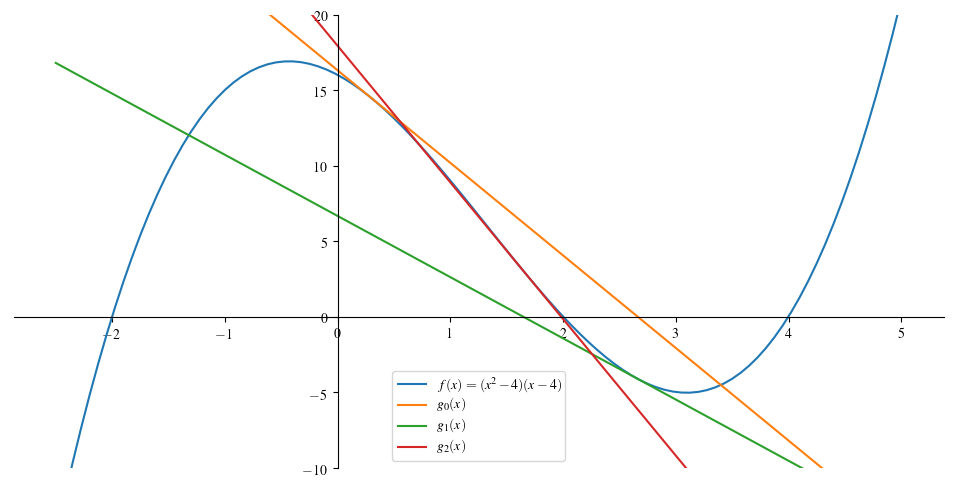

In [48]:
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rcParams['text.usetex'] = True

#Definimos la función y la primera derivada
fun= lambda x:(x+2)*(x-2)*(x-4)

funp= lambda x:3*(x**2)-8*x-4

#Definimos los puntos por graficar
x=nmp.linspace(-2.5,5,101)
ygf=fun(x)
x0=0.3
y0=fun(x0)
m0=funp(x0)
#Definimos los puntos de la recta aproximada (g0-y0)/(x-x0)=m0
yg0=y0+m0*(x-x0)
#Definimos la siguiente iteración
x1=x0-y0/m0
y1=fun(x1)
m1=funp(x1)
yg1=y1+m1*(x-x1)
#Definimos la siguiente iteración
x2=x1-y1/m1
y2=fun(x2)
m2=funp(x2)
yg2=y2+m2*(x-x2)

plt.figure(figsize=(12,6),dpi=100)
plt.plot(x,ygf)
plt.plot(x,yg0)
plt.plot(x,yg1)
plt.plot(x,yg2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.legend(['$f(x)=(x^2-4)(x-4)$','$g_0(x)$','$g_1(x)$','$g_2(x)$'])
plt.ylim(-10,20)
plt.show();

La siguiente pieza de código define la rutina ``findroots`` que halla las raíces de la función $f(x)$ a partir de un vector ``xv`` de valores iniciales de ensayo. Después se ensaya la rutina con el polinomio $f(x)=(x^2-4)(x-4)$ definido en la celda de código anterior y los valores iniciales $\vec{x}_0=\{0.3,-0.4,-3\}$

In [49]:
def findroots(f,fp,xv=[0.3],err=1e-5,countl=50):
# La función tiene como entradas necesarias la función f y su derivada fp
# xv: La siguiente entrada es el vector de posibles valores iniciales x0
# err: es la precisión con la que se quiere hallar las raíces
# countl: es el número máximo de iteraciones en la búsqueda de una raíz. Esto evita que se caiga 
# en un bucle infinito
    nr=len(xv)
    xn=xv[0]
    roots=[]
    for ir in range(nr):        
#---------------- Comienzo de búsqueda de raíz ---------------
        count=0
        while (abs(f(xn))>err):
            if (count>countl):
                break
            feval=f(xn); fpeval=fp(xn)
# Para monitorear el método, observamos el valor de xn y f(xn) en cada paso            
            print("Valor de (x"+str(count)+",y"+str(count)+")=("+str(round(xn,3))+","+str(round(f(xn),3))+")")
            if (fpeval==0) :
                xn=xn+0.1
            else:
                xn=xn-feval/fpeval
            count+=1
#---------------- Final de búsqueda de raíz ---------------             
# Imprime el resultado de la búsqueda            
        if (count>countl): 
            print("No se halló raíz. Se ha llegado al máximo número de iteraciones: "+str(countl))
        else:
            print("Raíz hallada: (x"+str(count)+",y"+str(count)+")= (",round(xn,3),",",round(f(xn),3),")")
        roots.append(round(xn,3))
# Paso a la siguiente búsqueda de raíz        
        if (ir<nr-1):
            xn=xv[ir+1]
# El output es una lista de raíces con precisión a 3 cifras decimales        
    return roots

# Se llama la rutina y se muestran los resultados
roots=findroots(fun,funp,[0.3,-0.4,-3])
print("Raíces halladas: "+str(roots))

Valor de (x0,y0)=(0.3,14.467)
Valor de (x1,y1)=(2.66,-4.121)
Valor de (x2,y2)=(1.643,3.064)
Valor de (x3,y3)=(1.982,0.146)
Valor de (x4,y4)=(2.0,0.001)
Raíz hallada: (x5,y5)= ( 2.0 , 0.0 )
Valor de (x0,y0)=(-0.4,16.896)
Valor de (x1,y1)=(52.4,132701.184)
Valor de (x2,y2)=(35.418,39285.056)
Valor de (x3,y3)=(24.116,11617.921)
Valor de (x4,y4)=(16.609,3428.029)
Valor de (x5,y5)=(11.646,1006.529)
Valor de (x6,y6)=(8.397,292.398)
Valor de (x7,y7)=(6.313,82.942)
Valor de (x8,y8)=(5.038,22.206)
Valor de (x9,y9)=(4.341,5.065)
Valor de (x10,y10)=(4.057,0.707)
Valor de (x11,y11)=(4.002,0.024)
Valor de (x12,y12)=(4.0,0.0)
Raíz hallada: (x13,y13)= ( 4.0 , 0.0 )
Valor de (x0,y0)=(-3,-35)
Valor de (x1,y1)=(-2.255,-6.796)
Valor de (x2,y2)=(-2.023,-0.567)
Valor de (x3,y3)=(-2.0,-0.005)
Raíz hallada: (x4,y4)= ( -2.0 , -0.0 )
Raíces halladas: [2.0, 4.0, -2.0]


## 2. El método de barrido

El **método de barrido** es mucho más sencillo pero mucho menos eficiente que el método de _Newton-Raphson_ y menos exacto. En este caso, solamente se genera una lista de valores de la función a lo largo de un intervalo y se escoge el valor con el menor absoluto. Es decir, para hallar una raíz $x_r$ de una función $f(x)$ en un intervalo $x\in \pas{a,b}$, este intervalo se particiona en los valores $\xv=\pap{x_0=a,x_1,\ldots , x_{N}=b}$, la raíz se define entonces como,
$$
x_r=x \in \xv : \min_{y\in \xv} \pac{\pav{f(y)}} =\pav{f(x)} \;.
\tag{3}
$$
Este método para el caso de $f(x)=(x+2)(x-2)(x-4)$ en el intervalo $\pas{1,3}$ se haría de la siguiente manera. También se grafica la función $\pav{f(x)}$ para ilustrar el resultado.

La raiz encontrada fue en x=2.00 y su valor fue |f(x)|=0.000


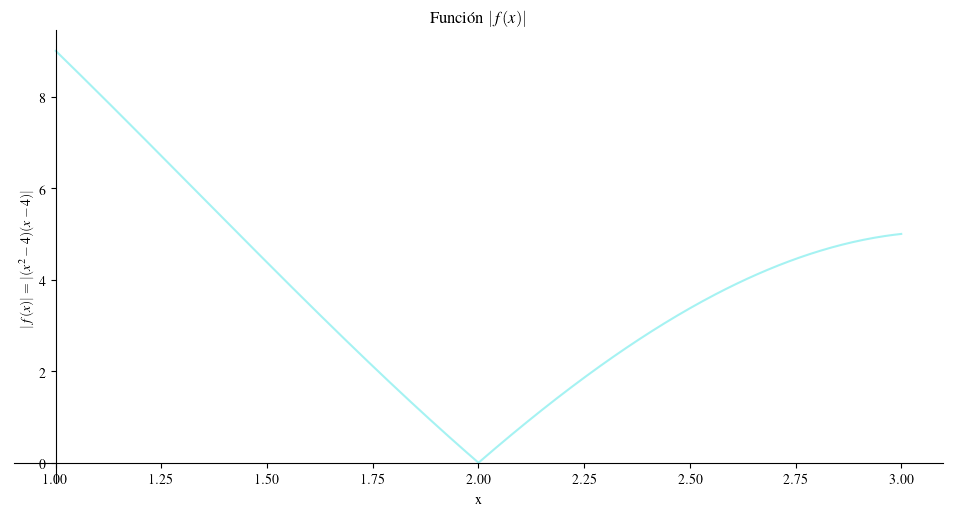

In [58]:
fun= lambda x:(x+2)*(x-2)*(x-4)
xv=np.linspace(1,3,401)
fav=np.abs(fun(xv))
i=np.argmin(fav)
xr=xv[i]
fxr=fav[i]
print("La raiz encontrada fue en x={0:0.2f} y su valor fue |f(x)|={1:0.3f}".format(xr,fxr))
plt.figure(figsize=(12,6),dpi=100)
ax = plt.gca()
plt.plot(xv,fav,color=(0.3,0.9,0.9,0.5))
# Este función se lee como "Get current axis"
ax=plt.gca()
ax.set_facecolor((0,0,0,0))
for pos in ['right','top']:
    ax.spines[pos].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',1))
ax.yaxis.set_ticks_position('left')
ax.set_title("Función $|f(x)|$")
ax.set_xlabel("x")
ax.set_ylabel("$|f(x)|=|(x^2-4)(x-4)|$")
plt.show()

## 3. El método de bisección

El **método de bisección** es intermedio en complejidad y eficiencia entre el _barrido_ y el método de _Newton-Raphson_. Su exactitud es tan buena como el segundo. Se trata de aplicar el **Teorema del valor intermedio básico**, el cual nos dice que si una función $f\pap{x}$ es continua en $x\in I=[a,b]$ y $f(a)f(b)<0$ (hay un cambio de signo entre los extremos del intervalo), entonces debe existir una raiz $x_r \in I$.

El algoritmo comienza con el intervalo $I_0=\pas{a,b}=\pas{a_0,b_0}$. El algoritmo avanza al bisectar el intervalo $I_n=\pas{a_n,b_n}$ en el punto intermedio $c_n=\frac{1}{2}\pap{a_n+b_n}$ y buscar uno de los dos intervalos $I_1=\pas{a_n,c_n}$ y $I_2=\pas{c_n,b_n}$ que contenga un cambio de signo entre sus extremos. De esta manera se define el intervalo $I_{n+1}$:
$$
I_{n+1}=
\begin{cases}
\pas{a_n,c_n} \;\;\;\text{si $f(c_n)f(a_n)<0$} \\
\pas{c_n,b_n} \;\;\;\text{si $f(c_n)f(b_n)<0$}
\end{cases}
\tag{4}
$$
Si en algún momento se encuentra una raíz en los extremos de los intervalos, o el tamaño del intervalo $I_n$ es menor que un error $\eps$, entonces se da por terminado el algoritmo.

La siguiente línea de código muestra el método para la misma función de los ejemplos anteriores comenzando en el intervalo $I_0=\pas{1,2.5}$. El método muestra el intervalos $I_n$ en cada paso.

In [51]:
fun= lambda x:(x+2)*(x-2)*(x-4)
err=1e-6
b=2.50
a=1.0
prec=b-a
#iteración de intervalos
while (fun(a)*fun(b) != 0) and prec > err:
    c=(a+b)/2
    if fun(a)*fun(c) < 0:
        b=c
    else:
        a=c
    prec=b-a
    print([a,b])
#se resume la raíz encontrada
if fun(b)==0:
    xr=b
elif fun(a)==0:
    xr=a
else:
    xr=(a+b)/2
print("La raiz encontrada fue en x={0:0.7f} y su valor fue f(x)={1:0.7f}".format(xr,fun(xr)))

[1.75, 2.5]
[1.75, 2.125]
[1.9375, 2.125]
[1.9375, 2.03125]
[1.984375, 2.03125]
[1.984375, 2.0078125]
[1.99609375, 2.0078125]
[1.99609375, 2.001953125]
[1.9990234375, 2.001953125]
[1.9990234375, 2.00048828125]
[1.999755859375, 2.00048828125]
[1.999755859375, 2.0001220703125]
[1.99993896484375, 2.0001220703125]
[1.99993896484375, 2.000030517578125]
[1.9999847412109375, 2.000030517578125]
[1.9999847412109375, 2.0000076293945312]
[1.9999961853027344, 2.0000076293945312]
[1.9999961853027344, 2.000001907348633]
[1.9999990463256836, 2.000001907348633]
[1.9999990463256836, 2.000000476837158]
[1.999999761581421, 2.000000476837158]
La raiz encontrada fue en x=2.0000001 y su valor fue f(x)=-0.0000010
